This project is about find value in survey questions done on stackoverflow in 2019. The main focus will be on the age question and if other answers are related to the age of the respondent.

In [2]:
#getting necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None 
pd.options.display.max_rows = 200    # None -> Be careful with this 
pd.options.display.max_colwidth = 100
pd.options.display.precision = 5




In [5]:
#stackoverflow 2019 data
survey_2019 = pd.read_csv('./survey_results_public_2019.csv')
survey_2019.describe()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.00000,5.59450e+04,5.58230e+04,64503.00000,49790.00000,79210.00000
mean,44442.00000,5.51901e+11,1.27111e+05,42.12720,5.08431,30.33670
std,25658.45633,7.33193e+13,2.84152e+05,37.28761,5.51393,9.17839
min,1.00000,0.00000e+00,0.00000e+00,1.00000,0.00000,1.00000
25%,22221.50000,2.00000e+04,2.57775e+04,40.00000,2.00000,24.00000
50%,44442.00000,6.20000e+04,5.72870e+04,40.00000,4.00000,29.00000
75%,66662.50000,1.20000e+05,1.00000e+05,44.75000,6.00000,35.00000
max,88883.00000,1.00000e+16,2.00000e+06,4850.00000,99.00000,99.00000


In [4]:
survey_2019.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Taken an online course in programming or software development (e.g. a MOOC),NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the company or organization;Specific department or te...,"Something else changed (education, award, media, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,Never,The quality of OSS and closed source software is about the s

In [4]:
### missing check for columns
missing={}
for x in survey_2019:
    missing[x] = survey_2019[x].isna().sum()/len(survey_2019.index)
sorted(missing.items(), key=lambda x: x[1], reverse=True)

[('BlockchainOrg', 0.4579953421914202),
 ('CodeRevHrs', 0.4398253884319836),
 ('ConvertedComp', 0.3719496416637602),
 ('CompTotal', 0.37057705072961084),
 ('MiscTechWorkedWith', 0.3296130868670049),
 ('BlockchainIs', 0.3230989053024763),
 ('PurchaseHow', 0.3124894524262232),
 ('MgrMoney', 0.3119381659034911),
 ('MgrIdiot', 0.31191566441276736),
 ('MgrWant', 0.3110943600013501),
 ('PurchaseWhat', 0.3021275159479315),
 ('UnitTests', 0.2949382896616901),
 ('WebFrameDesireNextYear', 0.2918330839418111),
 ('CompFreq', 0.28818784244456197),
 ('WorkWeekHrs', 0.27429317192263986),
 ('MiscTechDesireNextYear', 0.2742031659597448),
 ('WebFrameWorkedWith', 0.268454035079824),
 ('LastInt', 0.24445619522293352),
 ('WorkChallenge', 0.2333629602961196),
 ('SOHowMuchTime', 0.230696533645354),
 ('WorkPlan', 0.2246661341313862),
 ('DatabaseDesireNextYear', 0.2220447104620681),
 ('SONewContent', 0.21739815262761158),
 ('WorkLoc', 0.21182903367348085),
 ('WorkRemote', 0.2092526129856103),
 ('CodeRev', 0.20

In [5]:
##Columns with more than 30% missing data are totally removed because this means that almost a third of the respondents decided
##not to answer the question
for k,v in missing.items():
    if v > 0.30:
        print(k)
        survey_2019 = survey_2019.drop(k, axis=1)

MgrIdiot
MgrMoney
MgrWant
CompTotal
ConvertedComp
CodeRevHrs
PurchaseHow
PurchaseWhat
MiscTechWorkedWith
BlockchainOrg
BlockchainIs


In [6]:
##Business elimination, these variables was decided to be removed either because it was deemed to be irrelevant or
##it was decided to be too personal
survey_2019 = survey_2019.drop(columns=
['EduOther', 
'LastInt',
'JobFactors',
'CurrencySymbol',
'CurrencyDesc',
'CompFreq',
'WorkChallenge',
'SOVisitTo',
'SONewContent',
'Gender',
'Trans',
'Sexuality',
'Ethnicity'], axis=1)

In [7]:
#all questions that had more answers than 200 was eliminated because it is hard to find value in them
for i in survey_2019.columns:
    if len(survey_2019[i].unique()) > 200:
        print(i)
        if i == 'Respondent':
            continue
        survey_2019 = survey_2019.drop(columns=i, axis=1)

Respondent
DevType
WorkWeekHrs
LanguageWorkedWith
LanguageDesireNextYear
DatabaseWorkedWith
DatabaseDesireNextYear
PlatformWorkedWith
PlatformDesireNextYear
WebFrameWorkedWith
WebFrameDesireNextYear
MiscTechDesireNextYear
DevEnviron


In [8]:
#missing analysis
#missing rows, users that did not participate enough will be removed
survey_2019['missing_row_rate'] = (len(survey_2019.columns) - survey_2019.apply(lambda x: x.count(), axis=1))/len(survey_2019.columns)
survey_2019.sort_values(by=['missing_row_rate'], ascending = 0)


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,OrgSize,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,JobSeek,LastHireDate,FizzBuzz,ResumeUpdate,WorkPlan,WorkRemote,WorkLoc,ImpSyn,CodeRev,UnitTests,OpSys,Containers,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Dependents,SurveyLength,SurveyEase,missing_row_rate
88847,83648,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.93878
88389,12779,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.93878
88458,22994,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.93878
88502,29513,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.93878
88595,42460,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.93878
88610,44453,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.93878
88790,73472,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.93878
88789,73408,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.93878
88666,52784,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.93878
88403,14848,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.93878


In [9]:
print(survey_2019.groupby(['missing_row_rate']).size())

missing_row_rate
0.00000    27384
0.02041    22577
0.04082    11258
0.06122     4633
0.08163     2065
0.10204      970
0.12245      526
0.14286      884
0.16327      680
0.18367      456
0.20408      262
0.22449     1704
0.24490     2950
0.26531     2731
0.28571     2331
0.30612     2494
0.32653     1806
0.34694      975
0.36735      578
0.38776      349
0.40816      220
0.42857      182
0.44898      117
0.46939       96
0.48980       78
0.51020       56
0.53061       38
0.55102       45
0.57143       38
0.59184       37
0.61224       27
0.63265       20
0.65306       35
0.67347       23
0.69388       19
0.71429       21
0.73469       19
0.75510       16
0.77551        8
0.79592       13
0.81633       12
0.83673        7
0.85714        8
0.87755        1
0.89796       83
0.91837       41
0.93878       10
dtype: int64


In [10]:
#decision, continue with users answering at least 50%

survey_2019_user_elim = survey_2019.loc[survey_2019['missing_row_rate'] <= 0.5]
survey_2019_user_elim = survey_2019_user_elim.drop('missing_row_rate', axis=1)


First question, does the age distribution change depending on country? First checking if age and country variables are ok

In [12]:
print(survey_2019_user_elim['Age'].isna().sum()/len(survey_2019_user_elim.index))
print(survey_2019_user_elim['Country'].isna().sum()/len(survey_2019_user_elim.index))


0.10329988902226349
0.0


No missing values for countries but missing values exist for age. Replacing missing with 0 to see which countries has the most missing ratio as well. Rounding down all ages. Distribtuion analysis will be done on top 5 countries

In [13]:
survey_2019_user_elim['Age'] = survey_2019_user_elim['Age'].fillna(0)
survey_2019_user_elim['Age'] = survey_2019_user_elim['Age'].astype('int32')

In [14]:
age_distr = pd.DataFrame()
age_distr['Age'] = range(99)
for x in survey_2019_user_elim['Country'].value_counts()[:5].reset_index(name='count')['index']:
    age_distr = age_distr.merge(survey_2019_user_elim[survey_2019_user_elim['Country']==x].groupby('Age').count()['Respondent'].reset_index(name=x), how='left', on='Age') 

In [15]:
age_distr = age_distr.fillna(0)
for x in age_distr.drop(['Age'], axis=1):
    age_distr[x]/sum(age_distr[x])

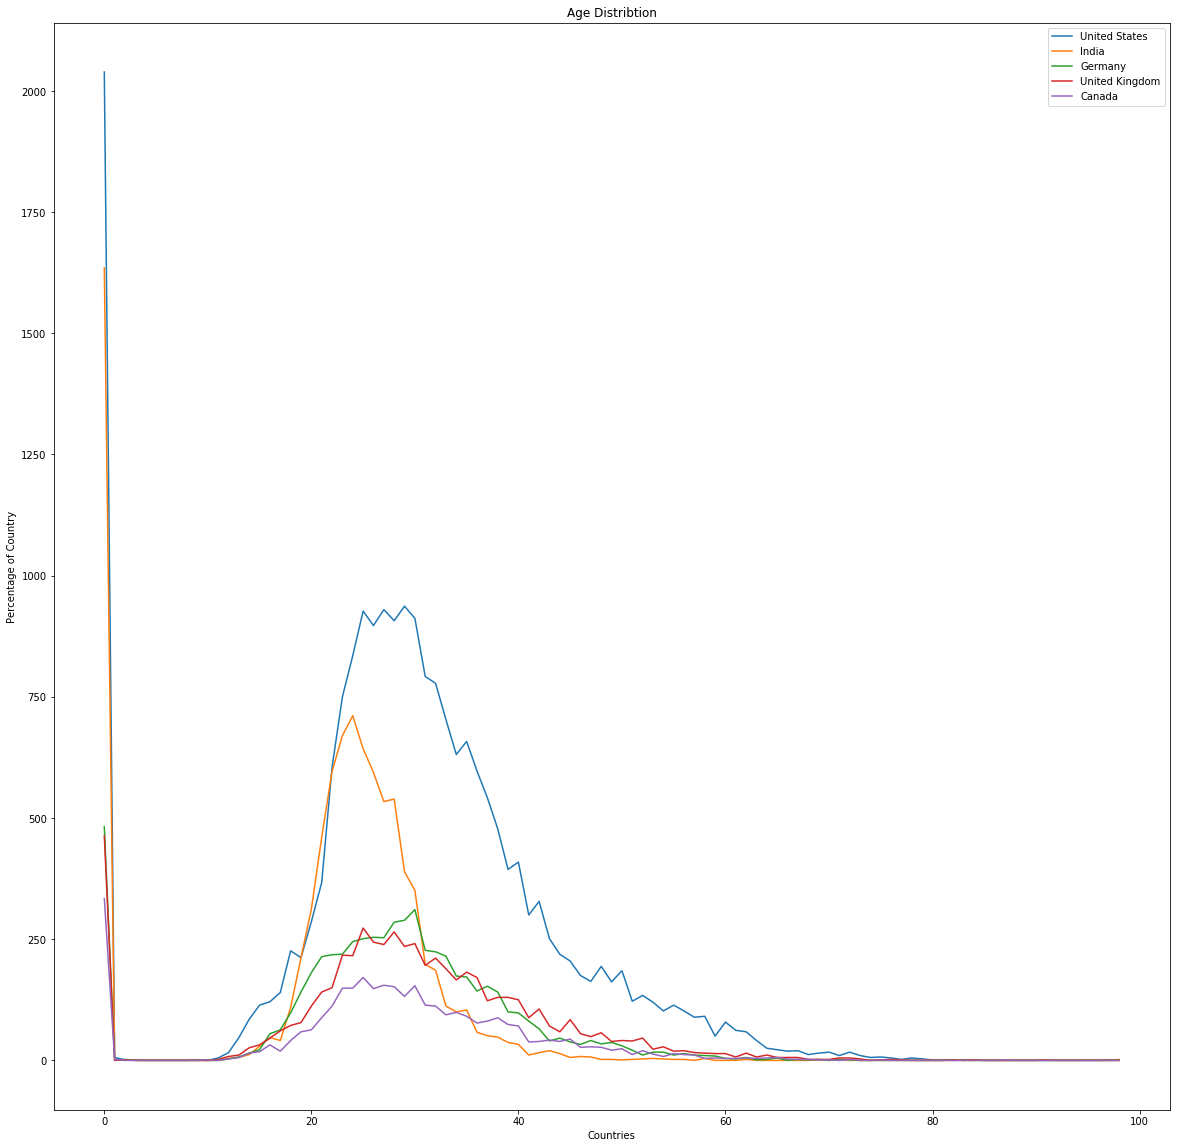

In [16]:
plt.figure(figsize=(20,20))
plt.plot(age_distr['United States'], label='United States')
plt.plot(age_distr['India'], label='India')
plt.plot(age_distr['Germany'], label='Germany')
plt.plot(age_distr['United Kingdom'], label='United Kingdom')
plt.plot(age_distr['Canada'], label='Canada')
 
# Add labels and title
plt.title("Age Distribtion")
plt.xlabel("Countries")
plt.ylabel("Percentage of Country")
plt.legend()

plt.savefig('country_age_distrs.png', bbox_inches='tight')
plt.show()

Next question is what variables are correlated with age? Ultimately, we will ask if age is predictable from other answers we gather but right now, its best to see if just any variable is enough correlated to guess age with.

In [17]:
corr_df = survey_2019_user_elim.copy()
for x in survey_2019_user_elim.select_dtypes(include='object'):
    corr_df[x] = survey_2019_user_elim[x].astype('category').cat.codes

In [18]:
corr_matrix = corr_df.corr(method='spearman')


In [19]:
corr_matrix['Age'].sort_values().reset_index(name='correlation').to_excel("correlation.xlsx")


Is it possible to guess age from other information we have gathered?

In [21]:
#dropping null values of Age
final_survey_df = survey_2019_user_elim[survey_2019_user_elim['Age']!=0]

In [22]:
X = pd.get_dummies(final_survey_df.drop(columns=['Respondent', 'Age']), dummy_na = True)

In [24]:
Y = final_survey_df['Age']

In [25]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)


In [26]:
#running the random forest regressor with grid search 
rand_clf = RandomForestRegressor()

parameters = {"n_estimators":[50,100],
             "max_depth":[3,5],
             "min_samples_leaf":[7,9]}
grid_obj = GridSearchCV(rand_clf, parameters)
grid_fit = grid_obj.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [27]:
best_clf = grid_fit.best_estimator_
best_predictions = best_clf.predict(X_test)


In [6]:
#mse for test data
mean_squared_error(y_test, best_predictions)

NameError: name 'y_test' is not defined

In [7]:
#mse for train data
best_predictions_train = best_clf.predict(X_train)
mean_squared_error(y_train, best_predictions_train)

NameError: name 'best_clf' is not defined

In [101]:
#dataframe where prediction and actual are compared
results = pd.DataFrame()
results['miss'] =  abs(y_test-best_predictions).round().astype(int)
results['miss'] = results['miss'].apply(lambda x: 10 if x>10 else x)

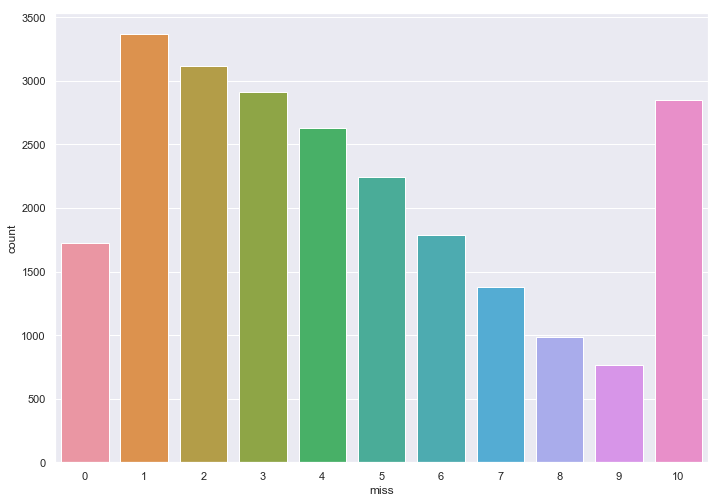

In [106]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="darkgrid")
ax = sns.countplot(x="miss", data=results)
fig = ax.get_figure()
fig.savefig('model_results.png')

The results shows that the age prediction model is not as precise as one would hope, which indicates that age is not easily predicted in the computer science community
